In [146]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import ipywidgets as widgets
from IPython.display import display, clear_output

In [147]:
class my_pca:
    def __init__(self, data):
        # Normalisation des données
        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(data)

        # Application de l'ACP
        pca = PCA()
        data_pca = pca.fit_transform(data_scaled)
        data_pca = pd.DataFrame(
            data_pca,
            columns=[f'PC{x}' for x in range(1,data_pca.shape[1]+1)]
        )

        self.data = data
        self.data_pca = data_pca
        self.pca = pca

    def eigenval_plot(self):
        plt.figure(figsize=(8,5))
        plt.bar(range(1, len(self.pca.explained_variance_ratio_)+1), self.pca.explained_variance_ratio_, color='blue', alpha=0.7)
        plt.xlabel("Factors")
        plt.ylabel("Percentage of Inertia")
        plt.title("Eigenvalues histogram")
        plt.xticks(np.arange(1, len(self.pca.explained_variance_ratio_)+1, step=1))
        plt.grid(axis='y', linestyle='--', alpha=0.7)

    def var_plot(self):
        # Conteneur d'affichage
        output = widgets.Output()

        # Fonction de mise à jour du graphique
        def update_plot(*_):
            with output:
                clear_output(wait=True)
                pc_x, pc_y = pc_x_widget.value - 1, pc_y_widget.value - 1  # Ajuster les indices
                fig, ax = plt.subplots(figsize=(fig_size_widget.value, fig_size_widget.value))  # Taille ajustable
                
                # Ajouter les noms des points en restant dans les limites définies
                if show_point.value:
                    sns.scatterplot(x=f'PC{pc_x+1}', y=f'PC{pc_y+1}', data=self.data_pca, s=30)
                    for i, txt in enumerate(self.data.index):
                        x, y = self.data_pca.iloc[i, pc_x], self.data_pca.iloc[i, pc_y]
                        ax.text(x, y, txt, fontsize=9, ha='right')
                
                # Cercle unité
                ax.add_artist(plt.Circle((0, 0), 1, color='gray', linestyle='--', fill=False))
                
                # Flèches des variables
                correlations = self.pca.components_.T * np.sqrt(self.pca.explained_variance_)
                for i in range(correlations.shape[0]):
                    x, y = correlations[i, pc_x], correlations[i, pc_y]
                    plt.arrow(0, 0, x, y, color='red', alpha=0.7, head_width=0.04, head_length=0.04)
                    if show_vector_labels.value:
                        plt.text(x, y, self.data.columns[i], fontsize=10, ha='center', va='center')
                
                # Ajustements visuels pour se focaliser sur [-axis_limit, axis_limit]
                ax.set_xlim(-axis_limit_widget.value, axis_limit_widget.value)
                ax.set_ylim(-axis_limit_widget.value, axis_limit_widget.value)
                ax.set_xlabel(f'PC{pc_x+1}')
                ax.set_ylabel(f'PC{pc_y+1}')
                ax.set_title('Variable plots (CPA)')
                ax.set_aspect('equal')
                plt.axhline(0, color='grey', linestyle='--')
                plt.axvline(0, color='grey', linestyle='--')
                plt.grid(False)
                plt.show()

        # Widgets pour sélectionner les composantes principales
        pc_x_widget = widgets.IntSlider(value=1, min=1, max=self.pca.n_components_, description='PC X:')
        pc_y_widget = widgets.IntSlider(value=2, min=1, max=self.pca.n_components_, description='PC Y:')
        show_point = widgets.Checkbox(value=True, description='Supplementary variables')
        show_vector_labels = widgets.Checkbox(value=True, description='Vector labels')
        fig_size_widget = widgets.IntSlider(value=10, min=8, max=14, description='Figure length')
        axis_limit_widget = widgets.IntSlider(value=2, min=1, max=5, description='Axis limit')

        # Liaison des widgets
        for widget in (pc_x_widget, pc_y_widget, show_point, show_vector_labels, fig_size_widget, axis_limit_widget):
            widget.observe(update_plot, names='value')

        # Affichage
        display(widgets.VBox([pc_x_widget, pc_y_widget, show_point, show_vector_labels, fig_size_widget, axis_limit_widget]), output)
        update_plot()

In [148]:
os.getcwd()

'c:\\Users\\Matteo\\Desktop\\TG\\Python'

In [149]:
df = pd.read_csv(os.getcwd()+"\\dataset_Clean.csv", index_col='Metrics')
year='2017'
dataset = df[df.Date == f'31/12/{year}']
dataset = dataset.drop('Date',axis=1)

acp = my_pca(dataset.T)

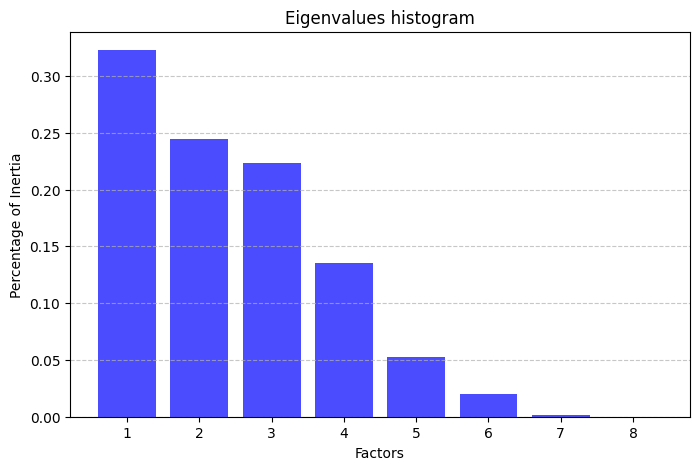

In [150]:
acp.eigenval_plot()

In [151]:
acp.var_plot()

Output()